# EDA (Exploratory Data Analysis)
> Now as we have cleaned our data according to our needs. We will move towards EDA to get useful insights from our data for further use 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [5]:
df=pd.read_csv("cleaned_data.csv")

In [9]:
print(df.shape)
print(df.info())
print(df.describe())
print(df.isnull().sum())

(397924, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   InvoiceNo      397924 non-null  int64  
 1   StockCode      397924 non-null  object 
 2   Description    397924 non-null  object 
 3   Quantity       397924 non-null  int64  
 4   InvoiceDate    397924 non-null  object 
 5   UnitPrice      397924 non-null  float64
 6   CustomerID     397924 non-null  float64
 7   Country        397924 non-null  object 
 8   TotalPurchase  397924 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 27.3+ MB
None
           InvoiceNo       Quantity      UnitPrice     CustomerID  \
count  397924.000000  397924.000000  397924.000000  397924.000000   
mean   560617.126645      13.021823       3.116174   15294.315171   
std     13106.167695     180.420210      22.096788    1713.169877   
min    536365.000000       1.000000    

## Univariate Analysis
* Unit Price
* Quantity
* Total Purchase

(array([3.97817e+05, 5.60000e+01, 9.00000e+00, 1.30000e+01, 3.00000e+00,
        5.00000e+00, 1.00000e+00, 4.00000e+00, 0.00000e+00, 3.00000e+00,
        2.00000e+00, 1.00000e+00, 2.00000e+00, 1.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([   0.   ,  162.855,  325.71 ,  488.565,  651.42 ,  814.275,
         977.13 , 1139.985, 1302.84 , 1465.695, 1628.55 , 1791.405,
        1954.26 , 2117.115, 2279.97 , 2442.825, 2605.68 , 2768.535,
        2931.39 , 3094.245, 3257.1  , 3419.955, 3582.81 , 3745.6

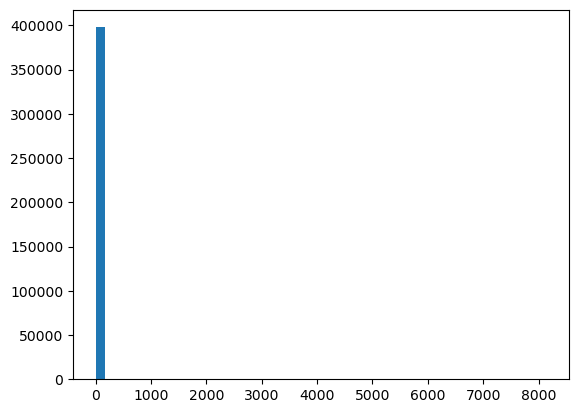

In [13]:
plt.hist(df["UnitPrice"],bins=50)

> As it is showing a strange plot It means our UnitPrice column has large outliers our the data is screwed, We will try two ways
* Using Log to hanlde skewness
* Using boxplot to find outliers 


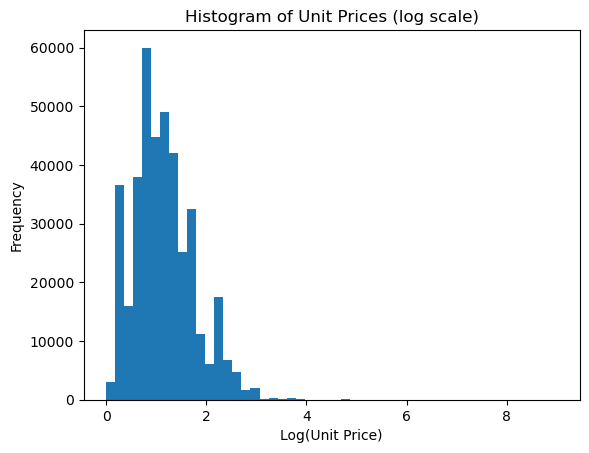

In [17]:
# At first we will use log 
plt.hist(np.log1p(df["UnitPrice"]), bins=50)
plt.xlabel("Log(Unit Price)")
plt.ylabel("Frequency")
plt.title("Histogram of Unit Prices (log scale)")
plt.show()

<Axes: ylabel='UnitPrice'>

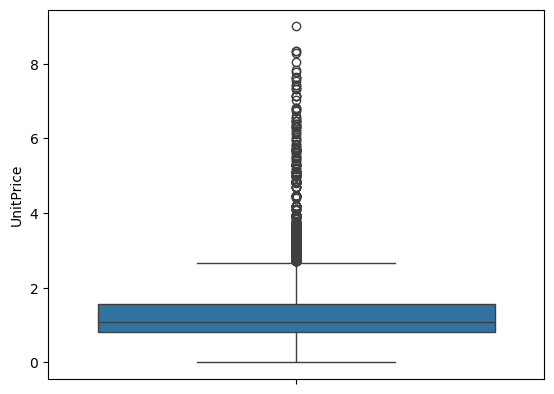

In [25]:
#Now we will use boxplot to find outliers
sns.boxplot(np.log1p(df["UnitPrice"]))

In [27]:
df["UnitPrice"].describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

In [29]:
df[df["UnitPrice"] > 1000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPurchase
76240,546328,M,Manual,1,2011-03-11 10:19:00,1687.17,14911.0,EIRE,1687.17
76241,546329,M,Manual,1,2011-03-11 10:22:00,1687.17,14911.0,EIRE,1687.17
97061,548813,M,Manual,1,2011-04-04 13:03:00,2382.92,12744.0,Singapore,2382.92
97063,548813,M,Manual,1,2011-04-04 13:03:00,1252.95,12744.0,Singapore,1252.95
97064,548820,M,Manual,1,2011-04-04 13:04:00,2053.07,12744.0,Singapore,2053.07
97588,548913,M,Manual,1,2011-04-05 09:45:00,1136.30,12669.0,France,1136.30
101491,549468,M,Manual,1,2011-04-08 14:27:00,1867.86,17940.0,United Kingdom,1867.86
118352,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029.0,United Kingdom,8142.75
139314,554155,M,Manual,1,2011-05-23 11:26:00,1241.98,12757.0,Portugal,1241.98
139991,554301,M,Manual,1,2011-05-23 14:46:00,1241.98,12757.0,Portugal,1241.98
